# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [42]:
from Utils import load_sms
sms_data = load_sms()
sms_data[:2]

[('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
  0),
 ('Ok lar... Joking wif u oni...', 0)]

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [43]:
interesting_words=set(['free','prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [44]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [45]:
Y_obs = [y for x,y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [46]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y,z in zip (Y_obs,Z_obs)])

In [47]:
F_X_12([1,0])

0.9551328068916008

This is the JDF for this problem

In [48]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0,2):
    print("y <= %d \t" % x1,end='')
    for x2 in range(0,2):
        print("%.2f" % (F_X_12((x1,x2))),end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [49]:
F_X_12((1,0))

0.9551328068916008

In [50]:
F_X_12((0,0)) == F_X_12((0,1))*F_X_12((1,0))

False

In [51]:
F_X_12((0,1))*F_X_12((1,0))

0.8270846721557743

In [52]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103*0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [53]:
np.mean([y for z,y in zip(Z_obs,Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [54]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [55]:
x = np.random.normal(size=100)

In [56]:
np.mean(x)

-0.120084972601258

In [57]:
g = lambda x: x**2

In [58]:
mean = np.mean(x)
y = x-mean
np.mean(y**4)

3.056488115668904

## Moments etc

In [59]:
import numpy as np
x = np.random.normal(size=100)

In [60]:
x

array([ 0.11829313,  0.56267581, -0.62236748,  1.78161644, -1.32708255,
       -0.59557903, -0.94893341, -1.04375261, -0.43960038,  0.74287049,
        0.6406662 , -0.54003825,  1.04320177, -0.72841124, -0.11248096,
       -1.81891589, -1.1313604 ,  0.77788178, -0.23288735, -0.6895062 ,
        1.73221702,  0.04096069, -2.00542674, -0.4486966 , -1.24205803,
        0.34941548,  2.88059274, -0.41576806,  0.28874071, -1.2900084 ,
       -0.71273647,  0.49803716, -0.90038606, -0.2678633 , -0.42076921,
       -1.77387395, -0.99039454, -0.27029625, -2.46744452,  0.56962732,
        0.09520327, -0.63314535, -0.08789764, -0.1933252 ,  0.82534221,
       -0.34995097,  1.24474895, -0.26633208,  0.99640734, -0.95305506,
       -1.9330904 , -0.94246468, -0.07467426,  0.16885045, -0.52603561,
        2.00748328,  0.70942979,  1.10132343,  0.86483181, -1.14603384,
        0.47395812, -1.51180773, -1.2949312 ,  0.04092404, -0.71229151,
       -0.70608883,  0.12809641, -0.29929969, -0.44949671,  1.33

## Sample mean

In [61]:
np.mean(x)

-0.1076730123823312

## Sample variance

In [62]:
np.var(x)

0.9947054302627508

Or by doing it yourself

In [63]:
mu = np.mean(x)
np.mean(np.power(x-mu,2))

0.9947054302627508

Higher moments, we can use `scipy`

In [64]:
from scipy.stats import skew, kurtosis

In [65]:
skew(x)

0.2996597586077958

In [66]:
kurtosis(x,fisher=False)

3.0208906817400933

## Moments and tail behavior

In [67]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data-mean)/std

(-3.0, 5.0)

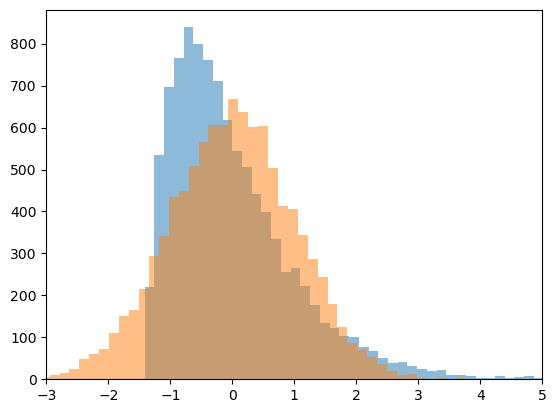

In [68]:
import numpy as np
chi2 = np.random.chisquare(4,size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt
_=plt.hist(standardize(chi2),bins=50,alpha=0.5)
_=plt.hist(standardize(normal),bins=50,alpha=0.5)
plt.xlim(-3,5)

In [69]:
from scipy.stats import skew, kurtosis
def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (np.mean(data),np.std(data),skew(data),kurtosis(data,fisher=False)))

In [70]:
print_basic_stats(standardize(normal))

mean: -0.00	std: 1.00	skew: -0.02	kurtosis: 2.98


In [71]:
print_basic_stats(standardize(chi2))

mean: -0.00	std: 1.00	skew: 1.40	kurtosis: 5.80


In [72]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: 0.00	std: 1.00	skew: 0.41	kurtosis: 3.05


In [73]:
np.mean(np.power(standardize(chi2),3)) # Skewness

1.3958041798054102

In [74]:
np.mean(np.power(standardize(chi2),4)) # kurtosis

5.803694570176214

## Transformations of random variables

Consider a Binomial random variable

In [75]:
n = 10
p = 0.5
x = np.random.binomial(n,p,size=1000)

Lets plot the empirical density

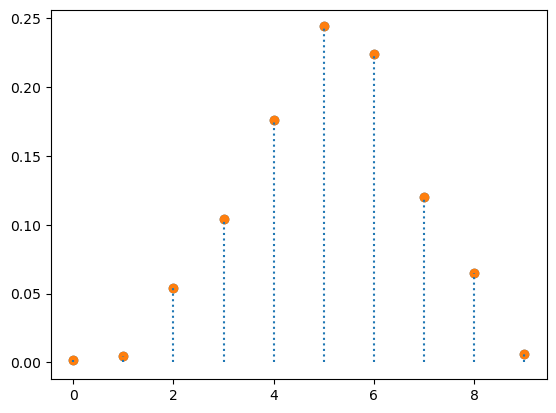

In [76]:
from Utils import makeEMF,makeEDF,plotEDF,plotEMF, emfToEdf
plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

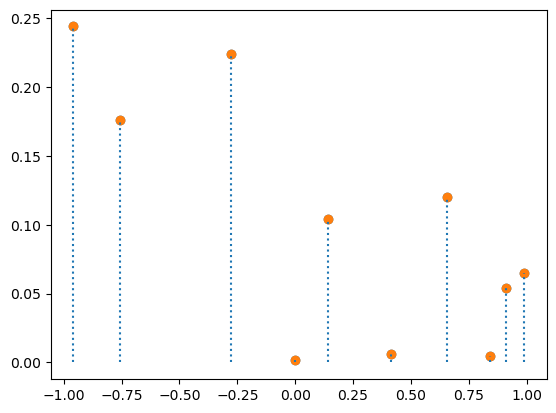

In [77]:
plotEMF(makeEMF(np.sin(x)))

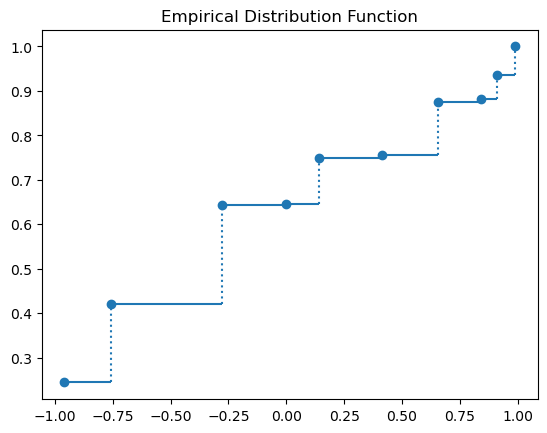

In [78]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [79]:
Y_space = np.sort(np.sin(np.arange(0,11)))
sin_inv = dict(zip(np.sin(np.arange(0,11)),np.arange(0,11)))

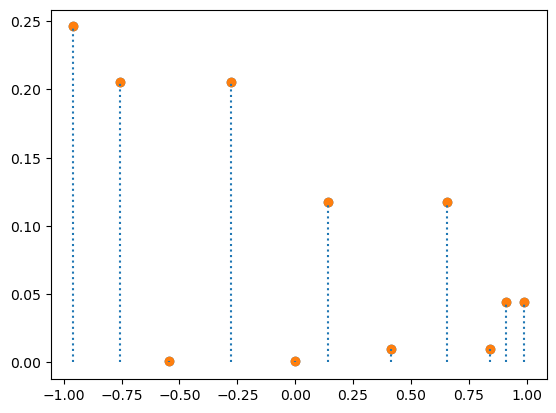

In [80]:
from scipy.special import binom as binomial
plotEMF([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space])

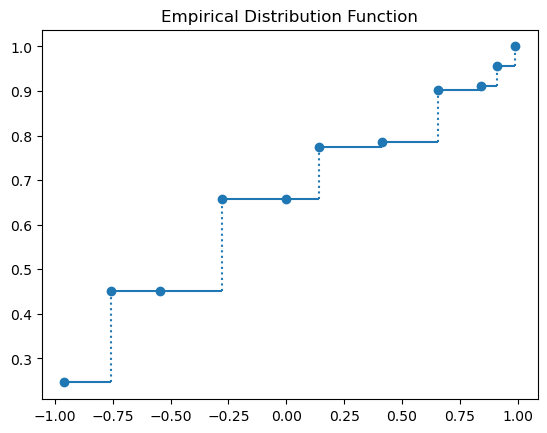

In [81]:
plotEDF(emfToEdf([(y,binomial(n,sin_inv[y])*(p**sin_inv[y])*((1-p)**(n-sin_inv[y]))) for y in Y_space]))

In [82]:
!head -n 5 data/CORIS.csv

row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
last column is chd = Coronary heart Disease = Y
all other columns are potential predictors of Y

1,160,12.00, 5.73,23.11,1,49,25.30, 97.20,52,1


In [83]:
import csv
with open("data/CORIS.csv","r") as f:
    reader = csv.reader(f)
    header = next(reader)
    for i in range(3):
        next(reader)
    data = [[float(x) for x in line] for line in reader]
print(header)
data

['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']


[[1.0, 160.0, 12.0, 5.73, 23.11, 1.0, 49.0, 25.3, 97.2, 52.0, 1.0],
 [2.0, 144.0, 0.01, 4.41, 28.61, 0.0, 55.0, 28.87, 2.06, 63.0, 1.0],
 [3.0, 118.0, 0.08, 3.48, 32.28, 1.0, 52.0, 29.14, 3.81, 46.0, 0.0],
 [4.0, 170.0, 7.5, 6.41, 38.03, 1.0, 51.0, 31.99, 24.26, 58.0, 1.0],
 [5.0, 134.0, 13.6, 3.5, 27.78, 1.0, 60.0, 25.99, 57.34, 49.0, 1.0],
 [6.0, 132.0, 6.2, 6.47, 36.21, 1.0, 62.0, 30.77, 14.14, 45.0, 0.0],
 [7.0, 142.0, 4.05, 3.38, 16.2, 0.0, 59.0, 20.81, 2.62, 38.0, 0.0],
 [8.0, 114.0, 4.08, 4.59, 14.6, 1.0, 62.0, 23.11, 6.72, 58.0, 1.0],
 [9.0, 114.0, 0.0, 3.83, 19.4, 1.0, 49.0, 24.86, 2.49, 29.0, 0.0],
 [10.0, 132.0, 0.0, 5.8, 30.96, 1.0, 69.0, 30.11, 0.0, 53.0, 1.0],
 [11.0, 206.0, 6.0, 2.95, 32.27, 0.0, 72.0, 26.81, 56.06, 60.0, 1.0],
 [12.0, 134.0, 14.1, 4.44, 22.39, 1.0, 65.0, 23.09, 0.0, 40.0, 1.0],
 [13.0, 118.0, 0.0, 1.88, 10.05, 0.0, 59.0, 21.57, 0.0, 17.0, 0.0],
 [14.0, 132.0, 0.0, 1.87, 17.21, 0.0, 49.0, 23.63, 0.97, 15.0, 0.0],
 [15.0, 112.0, 9.65, 2.29, 17.2, 1.0, 54.

In [84]:
import numpy as np
data_array = np.array(data)

In [85]:
Z = data_array[:,[1,6]]

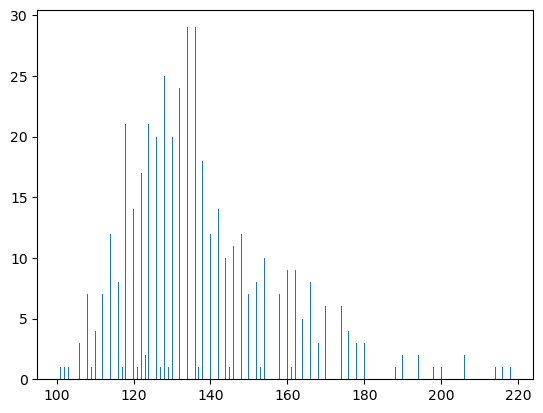

In [86]:
X = Z[:,0]
from Utils import discrete_histogram
discrete_histogram(X)

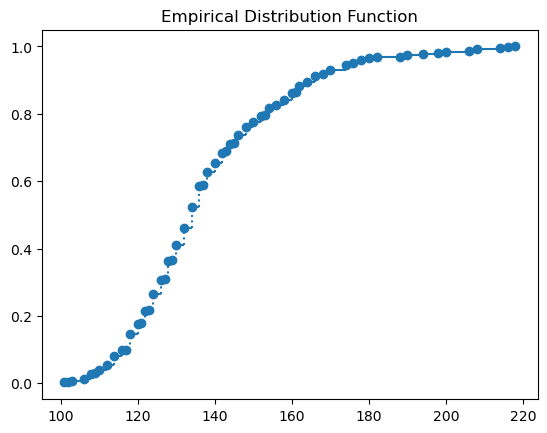

In [87]:
from Utils import makeEDF,plotEDF
F_X = makeEDF(X)
plotEDF(F_X)

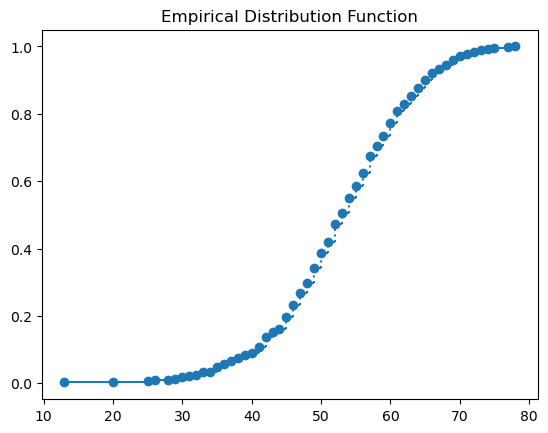

In [88]:
F_Y = makeEDF(Z[:,1])
plotEDF(F_Y)

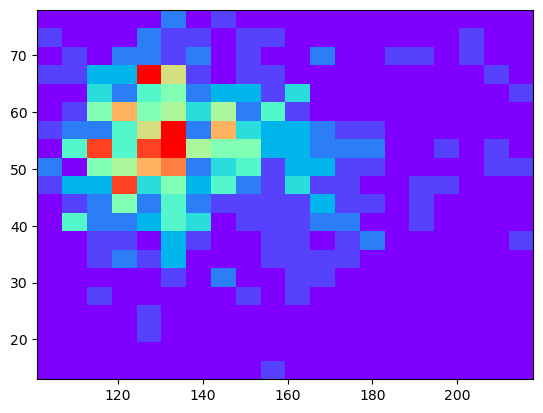

In [89]:
import matplotlib.pyplot as plt
_ = plt.hist2d(Z[:,0],Z[:,1], bins = 20, cmap = "rainbow")

In [90]:
X = Z[:,0]
Y = Z[:,1]

#What is the distribution of X given that Y is 13-
X_given_Y_55 = X[Y == 55]

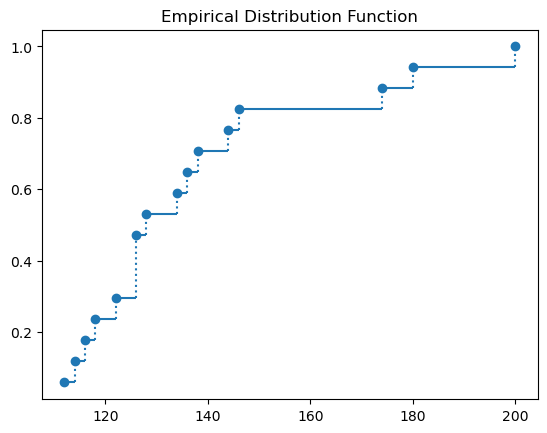

In [91]:
plotEDF(makeEDF(X_given_Y_55))

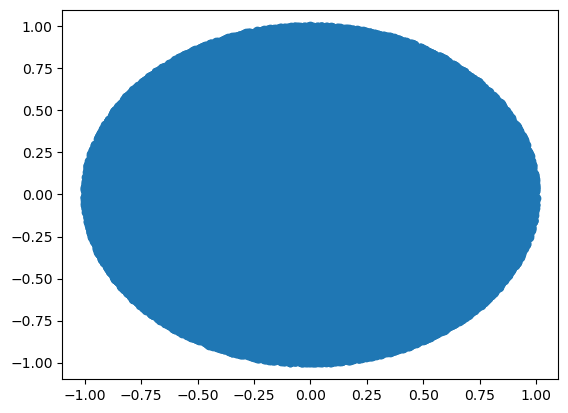

In [2]:
import matplotlib.pyplot as plt
X = np.random.uniform(-1,1,size = 100000)
Y = np.random.uniform(-1,1,size = 100000)
R = []
xi = []
yi = []
for i in range(len(X)):
    if X[i]**2 + Y[i]**2 <= 1:
        R.append(X[i]**2 + Y[i]**2)
        xi.append(X[i])
        yi.append(Y[i])
plt.scatter(xi,yi)


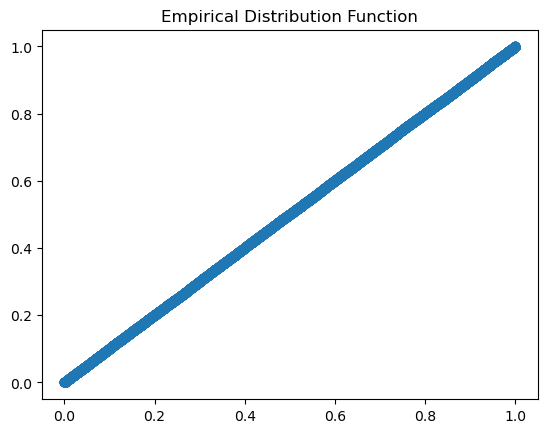

In [118]:
R_edf = makeEDF(R)
plotEDF(R_edf)

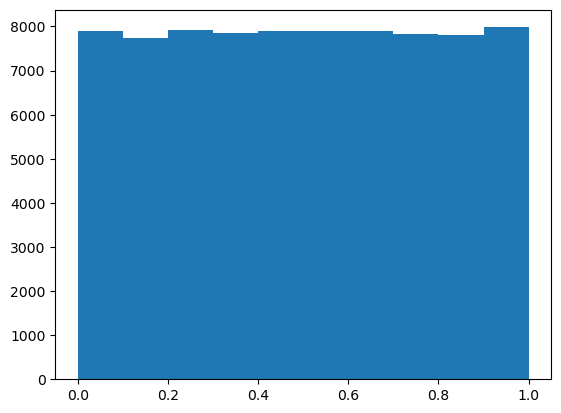

In [114]:
_ = plt.hist(R)

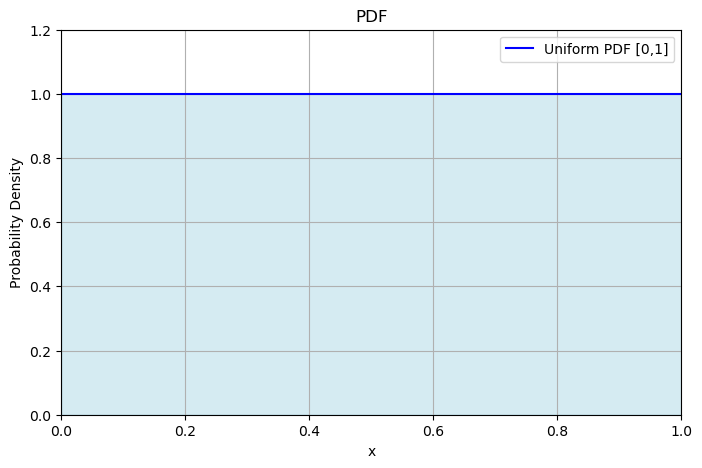

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the uniform distribution
a, b = 0, 1  # Uniform distribution over the interval [0,1]

# Create x values from 0 to 1
x = np.linspace(a, b, 1000)

# For a uniform distribution, the PDF is constant 1/(b-a) within the interval [a, b]
pdf = np.ones_like(x) / (b - a)

# Plotting the PDF of the uniform distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label='Uniform PDF [0,1]', color='blue')
plt.fill_between(x, pdf, color='lightblue', alpha=0.5)
plt.xlim(a, b)
plt.ylim(0, 1.2)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('PDF')
plt.legend()
plt.grid(True)
plt.show()


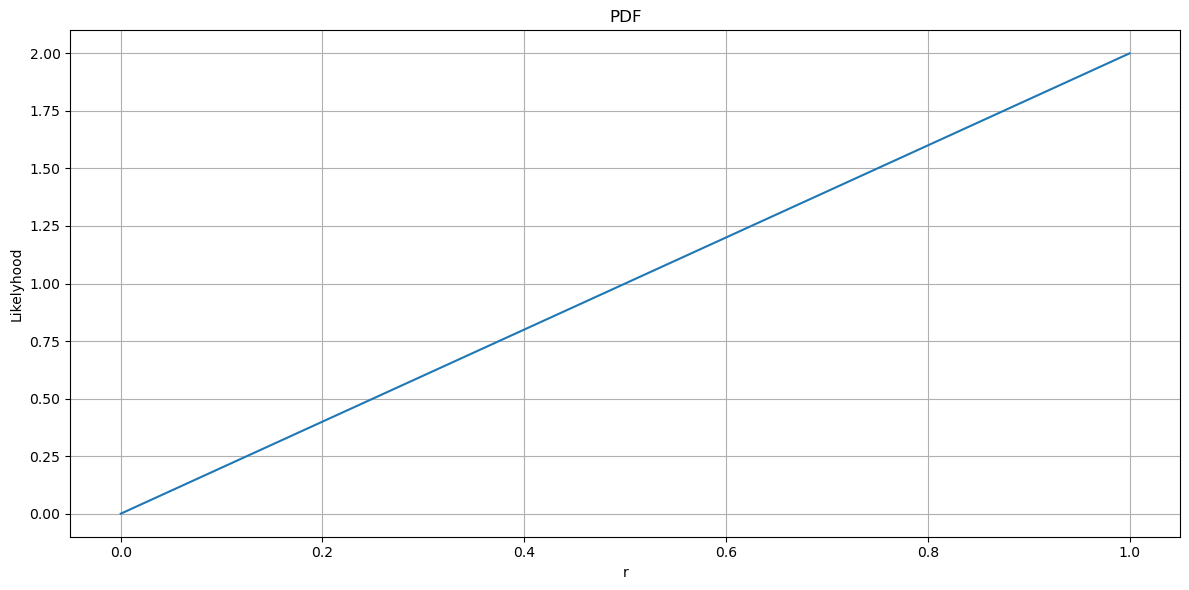

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the CDF and PDF for R
def cdf_R(r):
    if r < 0:
        return 0
    elif 0 <= r <= 1:
        return r**2
    else:
        return 1

def pdf_R(r):
    if 0 <= r <= 1:
        return 2 * r
    else:
        return 0

# Create an array of r values from -0.5 to 1.5 for plotting
r_values = np.linspace(0, 1, 500)

# Compute CDF and PDF values
cdf_values = np.array([cdf_R(r) for r in r_values])
pdf_values = np.array([pdf_R(r) for r in r_values])

# Plot the CDF and PDF
plt.figure(figsize=(12, 6))

# Plot CDF
# plt.subplot(1, 1, 1)
# plt.plot(r_values, cdf_values, label='CDF')
# plt.title('CDF')
# plt.xlabel('r')
# plt.ylabel('Probability')
# plt.grid(True)

# # Plot PDF
plt.subplot(1, 1, 1)
plt.plot(r_values, pdf_values, label='PDF of R')
plt.title('PDF')
plt.xlabel('r')
plt.ylabel('Likelyhood')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


/home/ccaulk/Fall2024/Intro_to_Data_Science/Utils.py:362: SyntaxWarning: invalid escape sequence '\i'
  """


KeyboardInterrupt: 

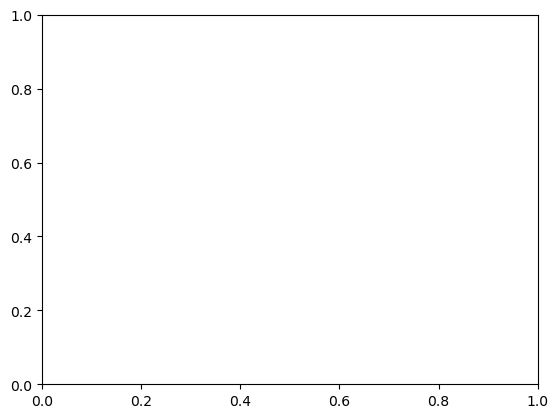

In [115]:
from Utils import discrete_histogram
discrete_histogram(R)

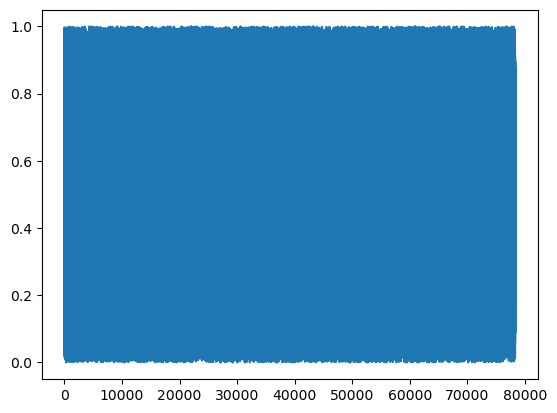

In [109]:
plt.plot(R)

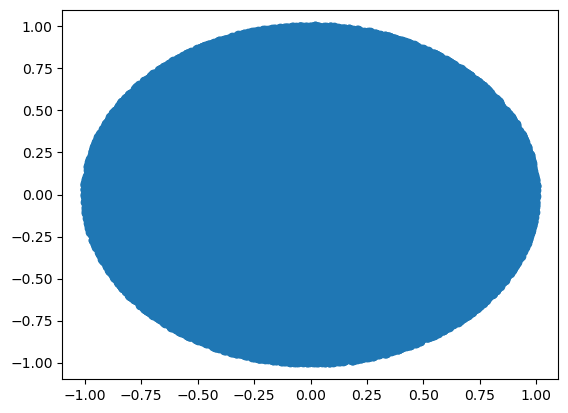

In [110]:
plt.scatter(xi,yi)

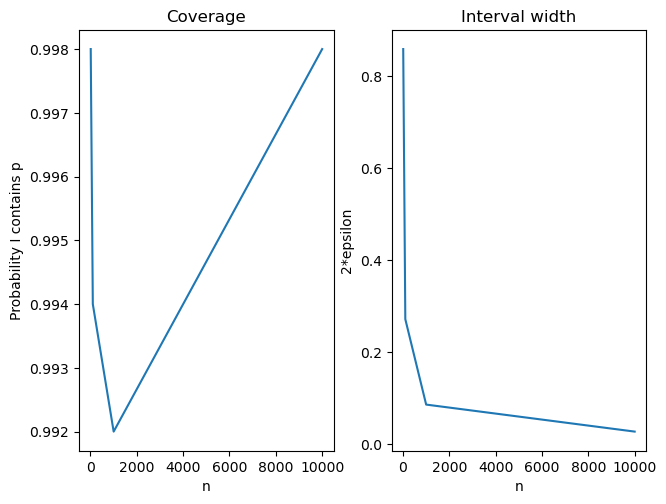

In [7]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
a=0.05
p=0.4
coverage=[]
epsilon= []
for n in [10,100,1000,10000]:
    epsilon_n=np.sqrt(np.log(2/a)/(2*n))
    epsilon.append(2*epsilon_n)
    cover=0
    for j in range(1000):
        r = bernoulli.rvs(p, size=n)
        sum =0
        for number in r:
            sum = sum+number
        p_n=sum/n
        if (np.abs(p-p_n)<epsilon_n):
            cover+=1
    coverage.append(cover/1000)
figure, axis = plt.subplots(1, 2)
figure.tight_layout()
axis[0].plot([10,100,1000,10000],coverage)
axis[0].set_title("Coverage")
axis[0].set_xlabel("n")
axis[0].set_ylabel("Probability I contains p")
# For Cosine Function
axis[1].set_title("Interval width")
axis[1].set_xlabel("n")
axis[1].set_ylabel("2*epsilon")
axis[1].plot([10,100,1000,10000],epsilon)

In [11]:
import numpy as np
from scipy.stats import bernoulli
a=0.05
for n in [10,100,1000,10000]:
    epsilon_n=np.sqrt(np.log(2/a)/(2*n))
    p=0.5
    prob=0
    for j in range(1000):
        r = bernoulli.rvs(p, size=n)
        sum=0
        for number in r:
            sum= sum+number
        p_n=sum/n
        if (np.abs(.4-p_n)<epsilon_n):
            prob+=1
    print(prob/1000)

0.993
0.767
0.0
0.0
